In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving eniac_final.csv to eniac_final.csv


In [ ]:
import io
eniac_df = pd.read_csv(io.BytesIO(uploaded['eniac_final.csv']))

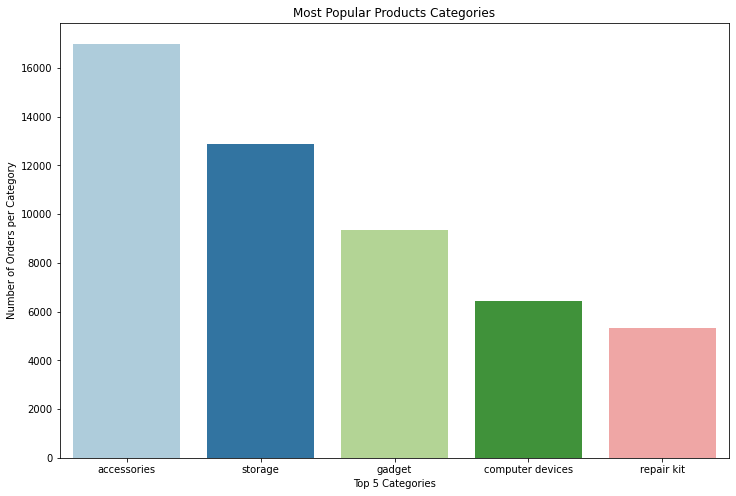

In [ ]:
# Most Popular Products Categories

categories = (
eniac_df
        .groupby('category')
        .agg({'order_id': 'count'})
        .sort_values('order_id', ascending=False)
        .head(5)
        .reset_index()
)
categories 


# Plotting

plt.subplots(figsize=(12, 8)) # define the size of the plot 
sns.set_palette("Paired") # set the colour palette

sns.barplot(data= categories, 
            x='category', 
            y='order_id')

plt.title('Most Popular Products Categories')
plt.xlabel('Top 5 Categories')
plt.ylabel('Number of Orders per Category')
plt.show()



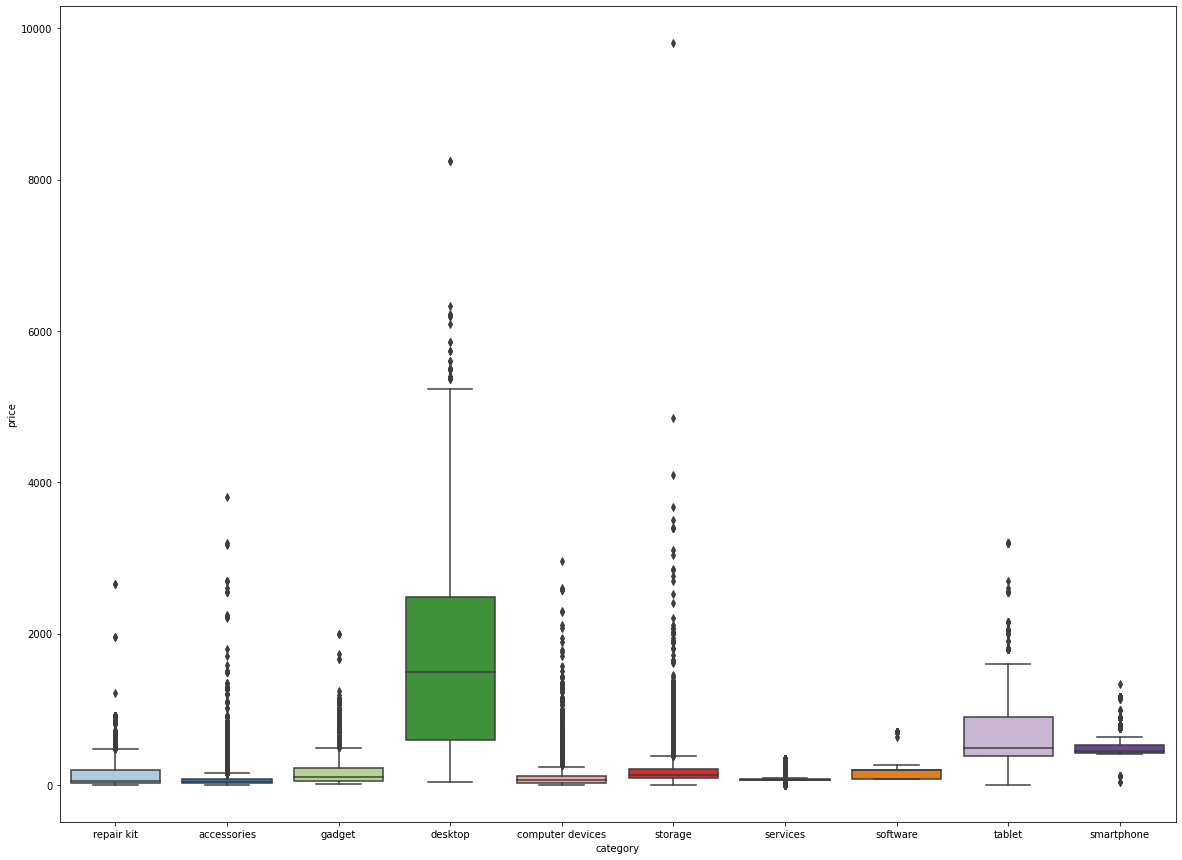

In [ ]:
# The Distribution of product prices across different categories -- BOXPLOT -- 
plt.subplots(figsize=(20, 15))
sns.boxplot(data=eniac_df, x='category', y='price');

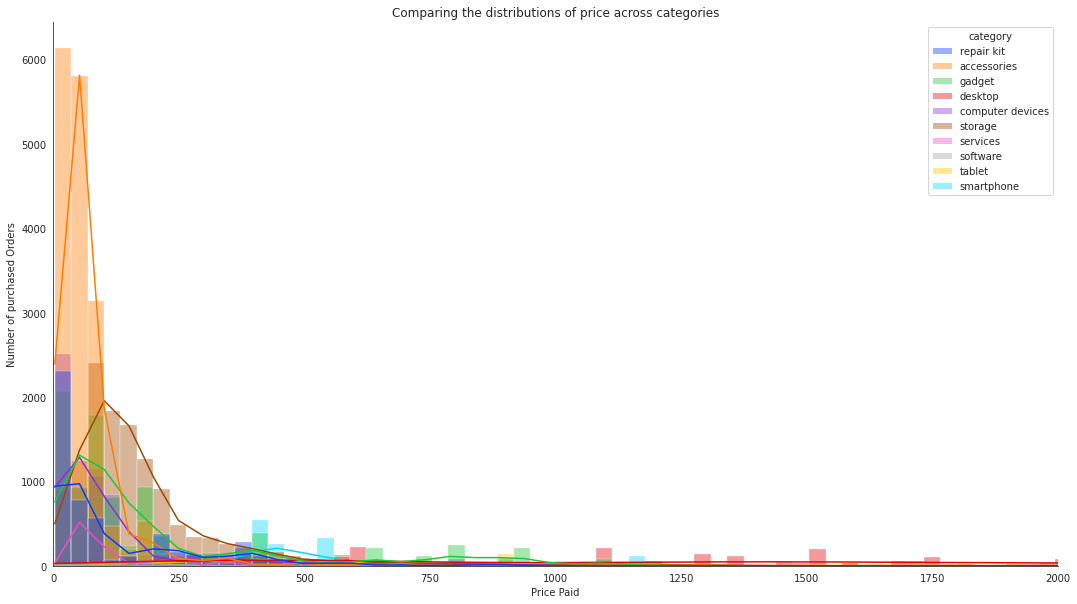

In [ ]:
# The Distribution of product prices across different categories -- HISTPLOT -- 

plt.subplots(figsize=(18, 10))
sns.set_palette("bright")
sns.histplot(data=eniac_df, x='price', hue='category', 
             alpha=.4, # add transparency to you chart
             kde=True, # add a density line in the histogram
             bins=300 # define the number of bins the variable price will be grouped
            )
sns.set_style("white")

plt.xlim(0, 2000)
plt.title('Comparing the distributions of price across categories')
plt.xlabel('Price Paid')
plt.ylabel('Number of purchased Orders')
sns.despine() # remove the top and right margin, to make your plot prettier 
sns.set_style("white")

In [ ]:
eniac_df

,order_id,product_quantity,unit_price,date,name,price,category,brand,discount
0,299545,1,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,60.99,repair kit,OWC,-10.00
1,299404,1,47.49,2017-01-01 22:50:39,OWC In-line Digital Temperature Sensor Kit HDD...,60.99,repair kit,OWC,-10.00
2,300650,1,49.99,2017-01-02 15:31:09,OWC In-line Digital Temperature Sensor Kit HDD...,60.99,repair kit,OWC,-10.00
3,300760,1,49.99,2017-01-02 17:20:31,OWC In-line Digital Temperature Sensor Kit HDD...,60.99,repair kit,OWC,-10.00
4,301975,1,49.99,2017-01-03 20:04:54,OWC In-line Digital Temperature Sensor Kit HDD...,60.99,repair kit,OWC,-10.00
...,...,...,...,...,...,...,...,...,...
60334,526066,1,83.99,2018-03-12 17:45:42,Education - Wacom Intuos Graphics Tablet S Blu...,99.00,software,Wacom,-326.99
60335,526093,1,83.99,2018-03-12 18:32:29,Education - Wacom Intuos Graphics Tablet S Blu...,99.00,software,Wacom,39.01
60336,526212,1,1181.33,2018-03-12 23:28:51,"Open - Apple MacBook Air 13 ""1.8GHz dual-core ...",1355.59,desktop,Apple,1085.60
60337,526440,1,878.18,2018-03-13 15:08:27,Synology DS218 + NAS Server | 6GB RAM | 16TB (...,1124.98,computer devices,Pack,1027.69


In [ ]:
# How many products are being discounted?
        # import the products table 
from google.colab import files
uploaded = files.upload() 

Saving products_final.csv to products_final (2).csv


In [ ]:
import io
products = pd.read_csv(io.BytesIO(uploaded['products_final.csv'])) # clean data 

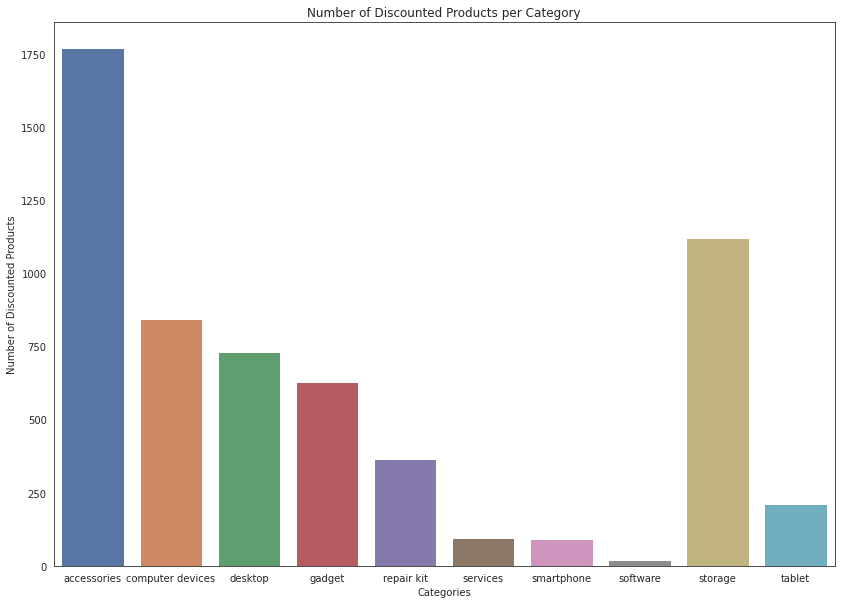

In [ ]:
products_discounted = (
products
        .loc[products['discount'] > 0] # some of the discount values are - !?! (due to the data corruption)
        .groupby('category')
        .agg({'sku': 'count'})
        .reset_index()
)
products_discounted

plt.subplots(figsize=(14, 10)) # define the size of the plot 
sns.color_palette("deep", as_cmap=True)
sns.set_palette("deep") # set the colour palette

sns.barplot(data= products_discounted, 
            x='category', 
            y='sku')

plt.title('Number of Discounted Products per Category')
plt.xlabel('Categories')
plt.ylabel('Number of Discounted Products')
plt.show()


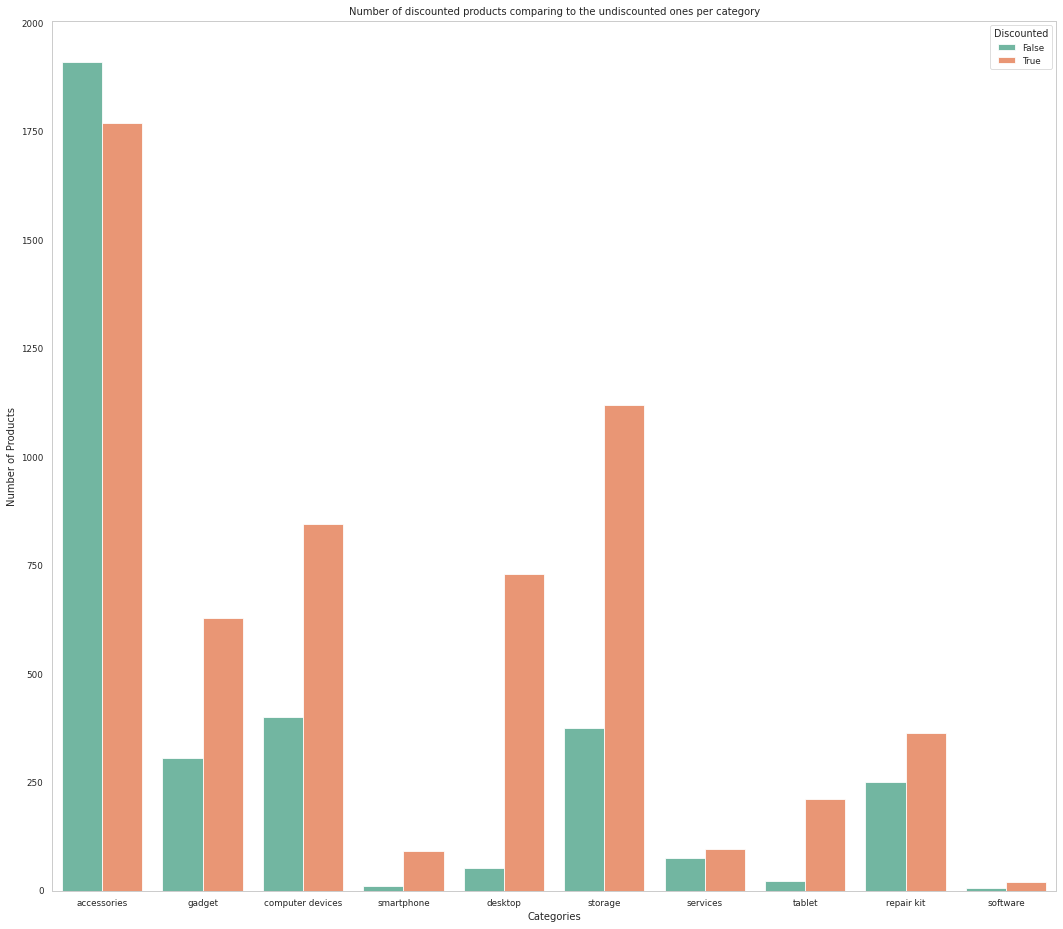

In [ ]:
# Number of discounted vs undiscounted products 
products = products.assign(Discounted = products['discount'] > 0)
sns.set_palette("Paired")

plt.subplots(figsize=(18, 16))

p = sns.countplot(
    data=products,
    x='category', 
    hue='Discounted',
    palette='Set2'

)
plt.title('Number of discounted products comparing to the undiscounted ones per category')
plt.xlabel('Categories')
plt.ylabel('Number of Products')
sns.set_context("paper", rc={"font.size":10,"axes.titlesize":14,"axes.labelsize":12})  

In [ ]:
eniac_df['date']= pd.to_datetime(eniac_df['date']) # convert date to year month
eniac_df['year_month'] = pd.to_datetime(eniac_df['date'].dt.strftime('%Y-%m'))

In [ ]:
eniac_df = eniac_df.assign(Discounted = eniac_df['discount'] > 0) # check the discount

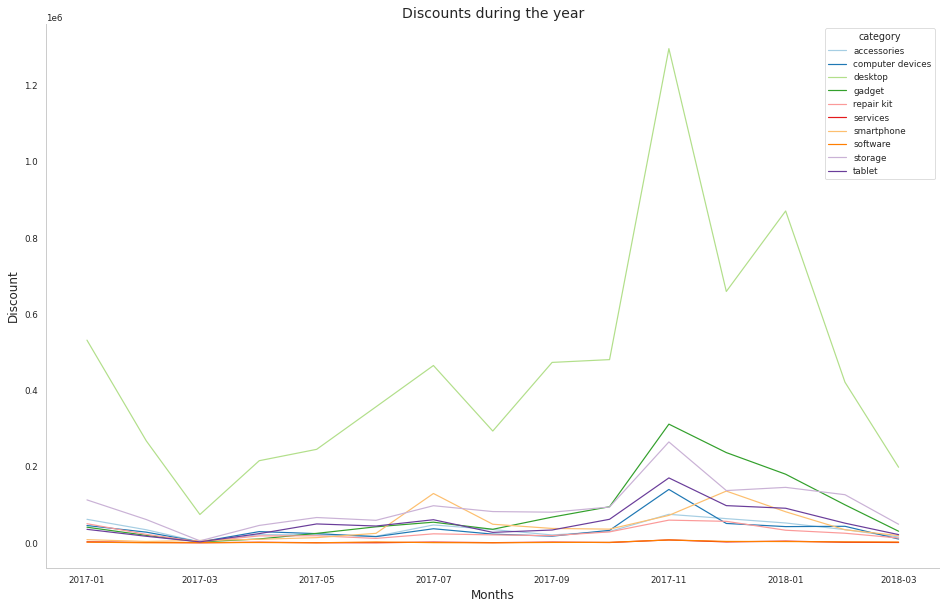

In [ ]:
# Exploring the discounts during the year ! 

new_df = eniac_df.query('Discounted==True')

p = (
new_df
        .groupby(['year_month','category'])
        .agg({'discount': 'sum'})
        .reset_index()
)
p

plt.figure(figsize=(16,10))
sns.lineplot(x="year_month", y="discount", hue="category", data=p)
plt.title('Discounts during the year')
plt.xlabel('Months')
plt.ylabel('Discount')
linewidth = 2
sns.despine() 
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_palette("bright")
plt.show()

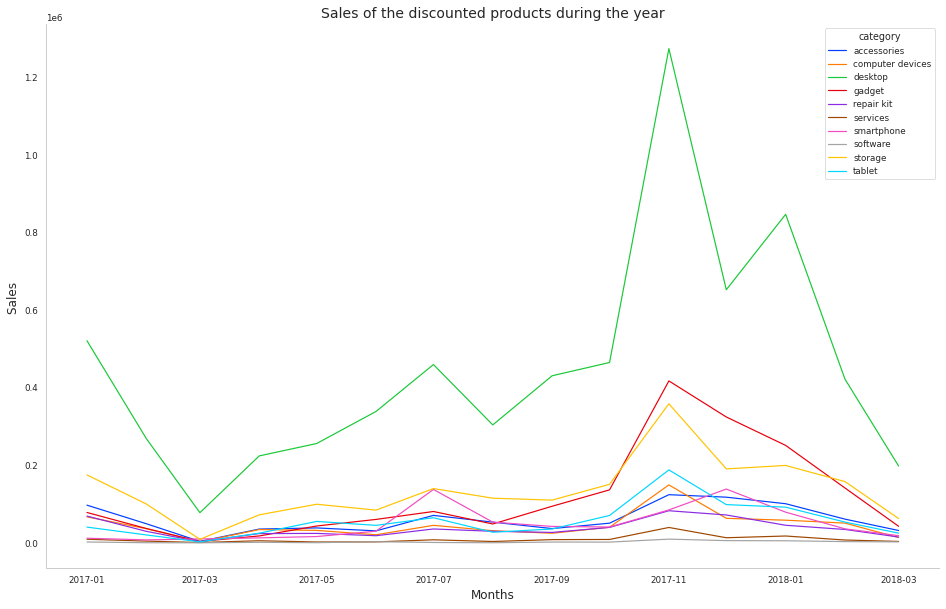

In [ ]:
# Does revenue grow whenever discounts increase? 

p2 = (
eniac_df
        .groupby(['year_month','category'])
        .agg({'unit_price': 'sum'})
        .reset_index()
)
p2 



plt.figure(figsize=(16,10))
sns.lineplot(x="year_month", y="unit_price", hue="category", data=p2)
plt.title('Sales of the discounted products during the year')
plt.xlabel('Months')
plt.ylabel('Sales ')
linewidth = 2
sns.despine() # remove the top and right margin, to make the plot prettier 
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_palette("bright")
plt.show()

Text(56.160765694444464, 0.5, 'Sales')

<Figure size 1440x1440 with 0 Axes>

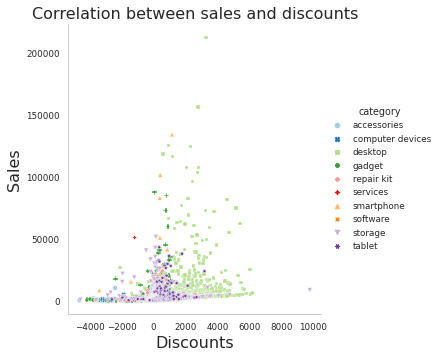

In [ ]:
# Explore the correlation between sales and discounts 
p3= (
eniac_df
        .groupby(['category', 'discount'])
        .agg({'unit_price': 'sum'})
        .reset_index()
)
p3

plt.figure(figsize=(20,20))
sns.relplot(x="discount", y="unit_price",hue="category",style="category", data=p3)
plt.title('Correlation between sales and discounts')
plt.xlabel('Discounts')
plt.ylabel('Sales')